In [1]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import re
from pathlib import Path

from wordcloud import WordCloud, STOPWORDS

In [2]:
# https://stackoverflow.com/questions/33404752/removing-emojis-from-a-string-in-python
def deEmojify(text):
    regrex_pattern = re.compile(
        pattern="["
        "\U0001F600-\U0001F64F"  # emoticons
        "\U0001F300-\U0001F5FF"  # symbols & pictographs
        "\U0001F680-\U0001F6FF"  # transport & map symbols
        "\U0001F1E0-\U0001F1FF"  # flags (iOS)
        "]+",
        flags=re.UNICODE,
    )
    return regrex_pattern.sub(r"", text)

In [3]:
text = Path("comments.txt").read_text(encoding="utf-8")
len(text)

545366

In [4]:
text = deEmojify(text)
len(text)

545046

In [5]:
text = text.replace("!", " ").replace("?", " ").replace(".", " ")
len(text)

545046

In [6]:
print(sorted(STOPWORDS))

['a', 'about', 'above', 'after', 'again', 'against', 'all', 'also', 'am', 'an', 'and', 'any', 'are', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', "can't", 'cannot', 'com', 'could', "couldn't", 'did', "didn't", 'do', 'does', "doesn't", 'doing', "don't", 'down', 'during', 'each', 'else', 'ever', 'few', 'for', 'from', 'further', 'get', 'had', "hadn't", 'has', "hasn't", 'have', "haven't", 'having', 'he', "he'd", "he'll", "he's", 'hence', 'her', 'here', "here's", 'hers', 'herself', 'him', 'himself', 'his', 'how', "how's", 'however', 'http', 'i', "i'd", "i'll", "i'm", "i've", 'if', 'in', 'into', 'is', "isn't", 'it', "it's", 'its', 'itself', 'just', 'k', "let's", 'like', 'me', 'more', 'most', "mustn't", 'my', 'myself', 'no', 'nor', 'not', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'otherwise', 'ought', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 'r', 'same', 'shall', "shan't", 'she', "she'd", "she'll", "she's", 

In [7]:
stopwords = {
    "and",
    "a",
    "do",
    "for",
    "the",
    "is",
    "my",
    "it",
    "in",
    "i",
    "r",
    "have",
    "am",
    "or",
}
stopwords.update({x for x in STOPWORDS if x.startswith("i'")})
stopwords

{'a',
 'am',
 'and',
 'do',
 'for',
 'have',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'in',
 'is',
 'it',
 'my',
 'or',
 'r',
 'the'}

In [8]:
def generate_cloud(map_file):
    mask = np.array(Image.open(Path(map_file)))
    wc = WordCloud(
        background_color="white", max_words=2000, mask=mask, stopwords=stopwords
    )
    wc.generate(text)
    wc.to_file(map_file.replace(".png", "-cloud.png"))

    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.figure()
    plt.imshow(mask, cmap=plt.cm.gray, interpolation="bilinear")
    plt.axis("off")
    plt.show()

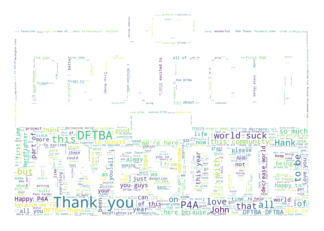

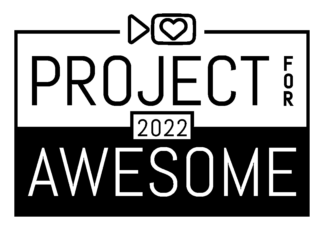

CPU times: user 7.35 s, sys: 354 ms, total: 7.7 s
Wall time: 7.36 s


In [13]:
%time generate_cloud("map1.png")

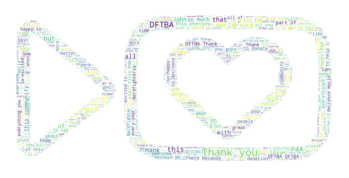

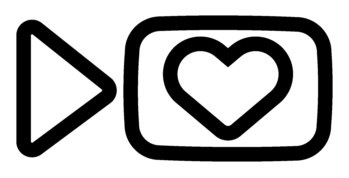

CPU times: user 21.5 s, sys: 692 ms, total: 22.2 s
Wall time: 22 s


In [14]:
%time generate_cloud("map2.png")

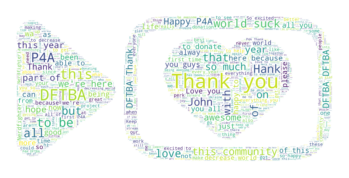

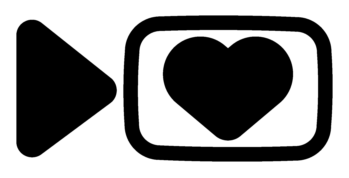

CPU times: user 32.6 s, sys: 789 ms, total: 33.4 s
Wall time: 33.4 s


In [11]:
%time generate_cloud("map3.png")

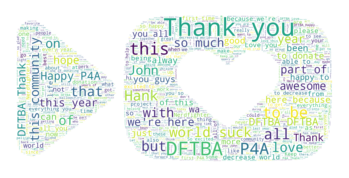

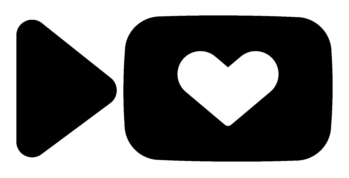

CPU times: user 29.5 s, sys: 701 ms, total: 30.2 s
Wall time: 30 s


In [12]:
%time generate_cloud("map4.png")